In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
most_recent

'2017-08-23'

In [11]:
# Calculate the date one year from the last date in data set.
one_year_stop = dt.datetime.strptime(most_recent, '%Y-%m-%d') - dt.timedelta(days=365)
one_year_stop

datetime.datetime(2016, 8, 23, 0, 0)

In [12]:
# Perform a query to retrieve the data and precipitation scores for one year from the last date in the data set.
dates_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_stop).all()
dates_precip

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [20]:
#create dataframe and sort by date
precip_df = pd.DataFrame(dates_precip, columns=['Date', 'Precipitation'])
precip_df = precip_df.set_index('Date').dropna()
precip_df

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


<AxesSubplot:xlabel='Date'>

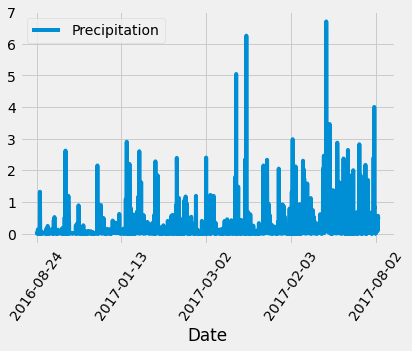

In [21]:
precip_df.plot(rot=55)


In [22]:
#summary stats for precipitation data
precip_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [23]:
### print query of Station and Measurement to pull out translated SQL code for the query to find column names ###
    ### print(session.query(Station)) ###
    
print(session.query(Station))

SELECT station.id AS station_id, station.station AS station_station, station.name AS station_name, station.latitude AS station_latitude, station.longitude AS station_longitude, station.elevation AS station_elevation 
FROM station


In [24]:
print(session.query(Measurement))

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement


In [25]:
# Design a query to calculate the total number stations in the dataset

measure_data = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs)
measure_df = pd.DataFrame(measure_data, columns = ['station', 'date', 'precipitation', 'tobs'])
measure_df.set_index(['station'])
measure_df.dropna()

measure_df

,station,date,precipitation,tobs
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0
19546,USC00516128,2017-08-20,NaN,78.0
19547,USC00516128,2017-08-21,0.56,76.0
19548,USC00516128,2017-08-22,0.50,76.0


In [26]:
#total stations using measure data
total_stations = len(measure_df['station'].unique())
print(f'There are {total_stations} total stations.')

There are 9 total stations.


In [27]:
station_data = session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()
station_data_df = pd.DataFrame(station_data, columns=['id', 'station', 'name', 'latitude', 'longitude', 'elevation'])
station_data_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [28]:
# confirming total stations using station data df
len(station_data_df['station'].unique())

9

In [29]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
#most active station using dataframe.  (Note that totals agree with above query.)
measure_df['station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [31]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active[0][0]
most_active_station_id

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station_id).all()

[(54.0, 85.0, 71.66378066378067)]

In [33]:
#find the most recent date for most active station id
most_active_most_recent = session.query(Measurement.date).filter(Measurement.station == most_active_station_id).\
    order_by(Measurement.date.desc()).first().date
most_active_most_recent


'2017-08-18'

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
last12_temp_mostactive = dt.datetime.strptime(most_active_most_recent, '%Y-%m-%d') - dt.timedelta(days=365)
last12_temp_mostactive

temp_data = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= last12_temp_mostactive).all()
temp_data

[('2016-08-19', 77.0),
 ('2016-08-20', 80.0),
 ('2016-08-21', 76.0),
 ('2016-08-22', 77.0),
 ('2016-08-23', 81.0),
 ('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 77.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 78.0),
 ('2016-09-22', 76.0),
 ('2016-09-23', 82.0),
 ('2016-09-24', 81.0),
 ('2016-09-25', 78.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 79.0),
 ('2016-09-29', 80.0),
 ('2016-09-30', 80.0),
 ('2016-10-

In [37]:
#generate temp_data_df then pull out temps to pass into histogram
temp_data_df = pd.DataFrame(temp_data, columns = ('Date', 'Temperature (F)'))
temp_data_df = temp_data_df

temps = temp_data_df['Temperature (F)']
temps

0       77.0
1       80.0
2       76.0
3       77.0
4       81.0
        ... 
2249    71.0
2250    78.0
2251    76.0
2252    76.0
2253    76.0
Name: Temperature (F), Length: 2254, dtype: float64

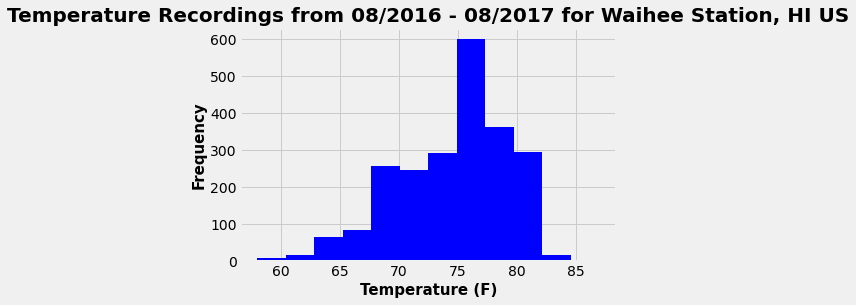

In [38]:
#plot histogram of temps, binned into 12 periods to simulate months to show frequency of temperature values over past year
#for most active station
plt.hist(temps, bins=12, color='b')
plt.title("Temperature Recordings from 08/2016 - 08/2017 for Waihee Station, HI US", fontweight='bold',fontsize=20)
plt.ylabel('Frequency', weight='bold', fontsize=15)
plt.xlabel('Temperature (F)', weight='bold', fontsize=15)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()